In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import transforms
import astropy.constants as const
import pandas as pd
import cmcrameri.cm as cmcm
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage[T1]{fontenc} \usepackage{amsmath} \usepackage{color}'
rcParams['font.family'] = 'serif'
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 1.2
rcParams['xtick.major.size'] = 10
rcParams['xtick.minor.width'] = 1.2
rcParams['xtick.minor.size'] = 6
rcParams['ytick.major.width'] = 1.2
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.width'] = 1.2
rcParams['ytick.minor.size'] = 6 

In [2]:
df1 = pd.read_excel("../../sav/EIS/EQSPY/atlas30_fitres.xlsx",sheet_name="r1")
df1["Z2A"] = df1["Z"]/df1["A"]
df1["ion"] = df1["ion"].str.strip()
df1["charge_state"] = df1["charge_state"].str.strip()
df1["fwhm_true_err"] = df1["fwhm_fit"]/(df1["fwhm_true"]*1e-3)*df1["fwhm_err"]*1e3

In [3]:
df1

,ion,charge_state,Z,A,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,Z2A,fwhm_true_err
0,Fe,x,9,55.8500,184.5127,184.537,0.07390,0.00140,25.9,0.161146,3.994595
1,Fe,viii,7,55.8500,185.1589,185.213,0.07620,0.00350,31.9,0.125336,8.360502
2,Fe,xi,10,55.8500,188.1929,188.216,0.07440,0.00100,27.1,0.179051,2.745387
3,Fe,xii,11,55.8500,193.4862,193.509,0.07570,0.00110,30.7,0.196956,2.712378
4,Fe,ix,8,55.8500,197.8343,197.854,0.07790,0.00170,35.7,0.143241,3.709524
5,Fe,xiii,12,55.8500,202.0236,202.044,0.07484,0.00055,28.4,0.214861,1.449366
6,Si,x,9,28.0855,258.3772,258.374,0.08490,0.00220,49.1,0.320450,3.804073
7,S,x,9,32.0600,264.2337,264.230,0.08600,0.00210,51.0,0.280724,3.541176
8,Fe,xiv,13,55.8500,264.7868,264.788,0.08200,0.00180,43.9,0.232766,3.362187
9,Fe,xv,14,55.8500,284.1600,284.163,0.08050,0.00280,41.1,0.250671,5.484185


In [4]:
c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value

In [5]:
line_name = df1["ion"] + r" \textsc{"+ df1["charge_state"] + r"}"

In [6]:
Teff_1 = df1["A"]*amu/(8*np.log(2)*k_B)*(c/(df1["wvl_chianti"]*1e-8))**2*(df1["fwhm_true"]*1e-11)**2
Teff_err_1 = 2*df1["A"]*amu/(8*np.log(2)*k_B)*(c/(df1["wvl_chianti"]*1e-8))**2*(df1["fwhm_true"]*1e-11)*df1["fwhm_true_err"]*1e-11

In [7]:
df_ion = df1[["ion","charge_state","Z","A","Z2A"]]
df_ion = df_ion.drop_duplicates()
ion_name = r"\textbf{" + df_ion["ion"] + r" \textsc{"+ df_ion["charge_state"] + r"}}"

In [8]:
df2 = pd.read_excel("../../sav/EIS/EQSPY/atlas30_fitres.xlsx",sheet_name="r2")
df2["Z2A"] = df2["Z"]/df2["A"]
df2["ion"] = df2["ion"].str.strip()
df2["charge_state"] = df2["charge_state"].str.strip()
df2["fwhm_true_err"] = df2["fwhm_fit"]/(df2["fwhm_true"]*1e-3)*df2["fwhm_err"]*1e3

In [9]:
df2

,ion,charge_state,Z,A,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,Z2A,fwhm_true_err
0,Fe,x,9,55.8500,184.5120,184.537,0.07380,0.00310,25.5,0.161146,8.971765
1,Fe,viii,7,55.8500,185.1910,185.213,0.07670,0.00680,33.0,0.125336,15.804848
2,Fe,xi,10,55.8500,188.1926,188.216,0.07670,0.00110,33.0,0.179051,2.556667
3,Fe,xii,11,55.8500,193.4862,193.509,0.07570,0.00120,30.6,0.196956,2.968627
4,Fe,ix,8,55.8500,197.8320,197.854,0.07600,0.00340,31.2,0.143241,8.282051
5,Fe,xiii,12,55.8500,202.0242,202.044,0.07543,0.00075,29.9,0.214861,1.892057
6,Si,x,9,28.0855,258.3800,258.374,0.08430,0.00320,48.0,0.320450,5.620000
7,S,x,9,32.0600,264.2310,264.230,0.08540,0.00340,50.0,0.280724,5.807200
8,Fe,xiv,13,55.8500,264.7860,264.788,0.08570,0.00380,50.5,0.232766,6.448713
9,Fe,xv,14,55.8500,284.1580,284.163,0.07730,0.00440,34.4,0.250671,9.887209


In [10]:
Teff_2 = df2["A"]*amu/(8*np.log(2)*k_B)*(c/(df2["wvl_chianti"]*1e-8))**2*(df2["fwhm_true"]*1e-11)**2
Teff_err_2 = 2*df2["A"]*amu/(8*np.log(2)*k_B)*(c/(df2["wvl_chianti"]*1e-8))**2*(df2["fwhm_true"]*1e-11)*df2["fwhm_true_err"]*1e-11

In [11]:
PaMIS_veff = np.array([28.54, 31.96])
PaMIS_veff_err = np.array([1.09, 0.97])
PaMIS_Teff = 55.85*amu/2/k_B*(PaMIS_veff*1e5)**2
PaMIS_Teff_err = 2*55.85*amu/2/k_B*(PaMIS_veff*1e5)*(PaMIS_veff_err*1e5)
PaMIS_Z2A = np.array([9,13])/np.array([55.85,55.85])

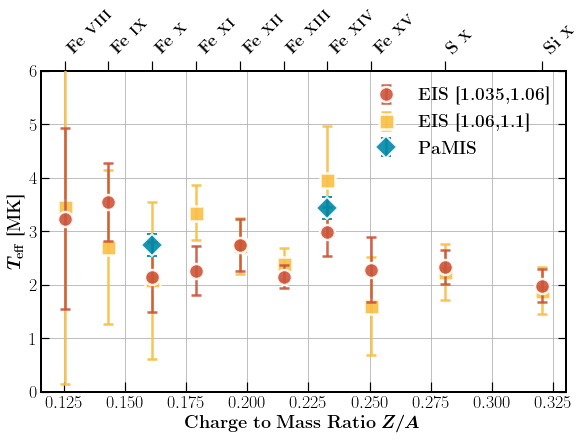

In [12]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)

ax.errorbar(df1["Z2A"].values, Teff_1.values/1e6, Teff_err_1.values/1e6, color="#CC543A",ls="none",marker="o",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{EIS [1.035,1.06]}",zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5)

ax.errorbar(df2["Z2A"].values, Teff_2.values/1e6, Teff_err_2.values/1e6, color="#F9BF45",ls="none",marker="s",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{EIS [1.06,1.1]}",zorder=14,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5)

ax.errorbar(PaMIS_Z2A, PaMIS_Teff/1e6, PaMIS_Teff_err/1e6, color="#0089A7",ls="none",marker="D",
            markersize=15,capsize=5,lw=2.5,label=r"\textbf{PaMIS}",zorder=16,markeredgecolor='white',
            markeredgewidth=2,alpha=0.9,capthick=2.5)

ax_ion = ax.secondary_xaxis(location="top")
ax_ion.set_xlim(ax.get_xlim())
ax_ion.set_xticks(df_ion["Z2A"].values)
ax_ion.set_xticklabels(ion_name,rotation=45,ha="left")
ax_ion.tick_params(labelsize=18)

ax.legend(loc="upper right",fontsize=18,frameon=False) 
ax.set_ylim(bottom=0,top=6)

ax.tick_params(labelsize=18,direction="in",which="both",right=True,top=False)
ax.set_xlabel(r"$\boldsymbol{\mathrm{Charge\ to\ Mass\ Ratio}\ Z/A}$",fontsize=18)
ax.set_ylabel(r"$\boldsymbol{T_{\rm eff}}$ \textbf{[MK]}",fontsize=18)
ax.grid("on")

plt.savefig(fname="../../figs/ms/Teff_Atlas30.pdf",dpi=300,format="pdf",bbox_inches="tight")